In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
train_df=pd.read_csv("data/optdigits.tra",header=None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [11]:
class KMeans:
    def __init__(self,k,iterations):
        self.k=k
        self.iterations=iterations
        self.means=[]
    def fit(self,training_data): 
        #Select random data points for k centroids 
        indices=np.random.choice(training_data.shape[0],size=self.k)
        self.means=training_data[indices]
        self.reconstruction_errors=[0]*self.iterations
        #Initialiize cluster results
        clusters=np.zeros([len(training_data)])
        for i in range(self.iterations):
            error=0
            for j in range(training_data.shape[0]):
                #Calculate distance between data point and cluster centroids
                distances=np.linalg.norm(training_data[j]-self.means,axis=1)
                #Select the centroid with least distance
                error+=np.min(distances)
                clusters[j]=np.argmin(distances)
            #Recalculate cluster centroids
            for j in range(self.k):
                vectors=training_data[clusters==j]
                self.means[j]=vectors.mean(axis=0)
            self.reconstruction_errors[i]=error
        return clusters
    

In [12]:
x_train=train_df.iloc[:,:-1].values
kmeans=KMeans(10,10)
clusters=kmeans.fit(x_train)

In [66]:
kmeans.reconstruction_errors

[136582.4292407099,
 107328.01170314726,
 102281.06675223503,
 100845.57456071653,
 100246.46281089935,
 99712.12852905323,
 99296.95677225583,
 99105.93451319005,
 98950.65709400449,
 98872.44446817567]

In [108]:
class PCA:
    def __init__(self):
        pass
    def fit(self,training_data):
        #Compute covariance matrix
        covariance_matrix=np.cov(training_data.transpose())
        #Calculate eigen values and eigen vectors
        eigen_values,eigen_vectors=np.linalg.eig(covariance_matrix)
        #Sort eigen vectors in the decreasing order of eigenvalues 
        eigen_vectors=eigen_vectors.transpose()
        self.components=eigen_vectors[eigen_values.argsort()[::-1]]
    def transform(self,training_data,n_components=2):
        w=self.components[:n_components]
        mean=np.mean(training_data,axis=0)
        return np.dot(w,np.transpose(training_data-mean))

In [109]:
pca=PCA()
pca.fit(x_train)
reduced_data=pca.transform(x_train)

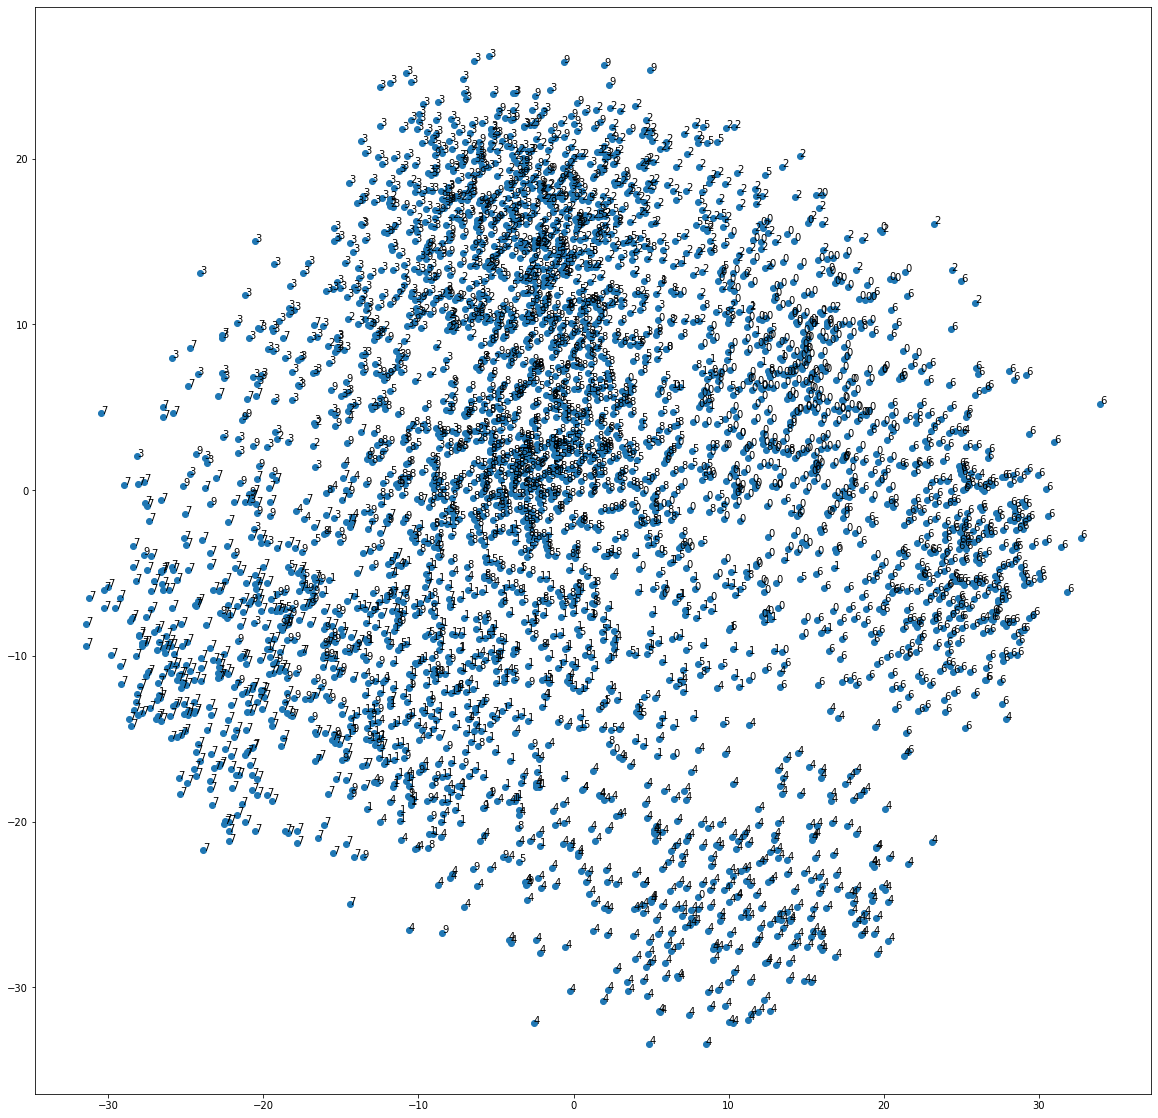

In [110]:
plt.figure(figsize=(20,20))
plt.scatter(reduced_data[0],reduced_data[1])
for x,y,label in zip(reduced_data[0],reduced_data[1],train_df.iloc[:,-1].values):
    plt.annotate(label,(x,y))
plt.show()